# LOGISTIC REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## load data

In [2]:
data = pd.read_csv("ex2data1.txt",header=None)
X = data.iloc[:,0:3].values
y = data.iloc[:,-1].values

## plot the data

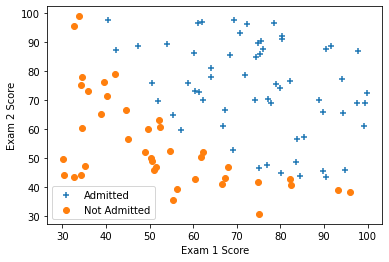

In [28]:
# Find Indices of Positive and Negative Examples
pos = (y==1)
neg = (y==0)
plt.scatter(data[pos][0],data[pos][1],marker ="+")
plt.scatter(data[neg][0],data[neg][1],marker ="o")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(["Admitted","Not Admitted"])
plt.show()

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
1,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
2,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


### define sigmoid function

![](sigmoid_function.PNG)

In [23]:
def sigmoid(z):
    g = np.size(z);
    g = 1 / (1+np.exp(-z))
    return g

In [24]:
# check with too big z value and it outputs 1
sigmoid(10000000)

1.0

In [25]:
# check with too small z value and it outputs 0
sigmoid(-10000000)

<ipython-input-23-709bd1e2ee93>:3: RuntimeWarning: overflow encountered in exp
  g = 1 / (1+np.exp(-z))


0.0

In [26]:
# check with value z to 0 and it outputs 1
sigmoid(0)

0.5

### define cost function and gradient

![](logistic_regression_cost_function.PNG)
![](logistic_regression_cost_function.PNG)

In [9]:
def costFunction(X, y, theta):
    m = len(y)
    grad = np.zeros(len(theta));
    predictions = sigmoid(X @ theta) # predictions of hypothesis on all examples
    J = (1/m) * (np.sum( -y * np.log(predictions)-(1-y) * np.log(1-predictions)))
    grad = 1/m*(X.T @ (predictions-y))
    return J, grad

### normalize features

In [10]:
def featureNormalize(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean) / std
    
    return X_norm, mean, std

In [11]:
# we first normalize features than add 1's column

In [12]:
m, n = data.shape[0], data.shape[1]
data_x = data.iloc[:,0:2]
data_y = data.iloc[:,-1]
X = data_x.values
X, mean_x ,std_x =featureNormalize(X)
y = data_y

In [13]:
X = np.append(np.ones((m,1)),X,axis=1)
theta = np.zeros(n)

### Apply Gradient Descent

In [14]:
J, grad = costFunction(X, y, theta)

In [15]:
grad

array([-0.1       , -0.28122914, -0.25098615])

In [16]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1));
    for i in range(num_iters):
        J, grad = costFunction(X, y, theta)
        theta = theta - alpha * grad 
        J_history[i] = J
    return theta, J_history  # return theta and J_history

In [17]:
theta, J_history = gradientDescent(X,y,theta, 0.1, 1000)

## Make Predictions on optimized thetas

In [18]:
def predict(X, theta):
    pred = X @ theta.T
    return pred>0

In [19]:
# student with grades 70 ,70 will be admitted ?
grades = np.array([60,70])
grades = (grades - mean_x) / std_x
grades = np.append(np.ones(1),grades)
predict(grades , theta )

True

In [20]:
# probability of student with grades  60, 70 to be admitted ?
print("Probability of student with notes 60, 70 to be addmitted" , sigmoid(grades @ theta) )

Probability of student with notes 60, 70 to be addmitted 0.722579642372461


### Plotting of Cost Function

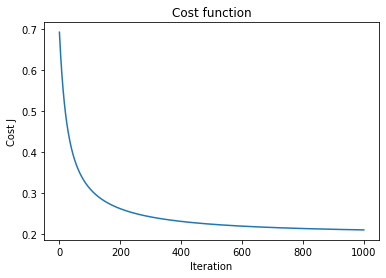

In [29]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost function")
plt.show()

### Best Fit decision boundary

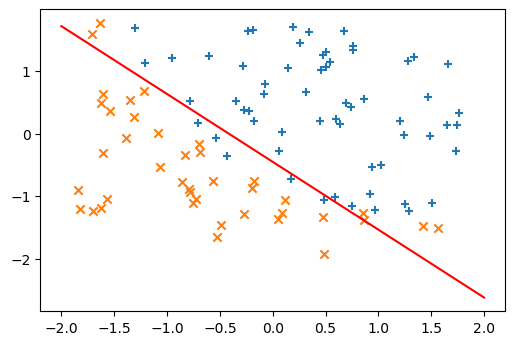

In [22]:
r = np.array(range(-2,3))
y_boundary = - (theta[0] + (theta[1]*r))/theta[2]
plt.figure(dpi=100)
plt.plot(r, y_boundary, c="r")
plt.scatter(X[pos][:,1],X[pos][:,2],marker ="+")
plt.scatter(X[neg][:,1],X[neg][:,2],marker ="x")